In [35]:
# Question 3 
# comparison of inflation, gas prices, median wages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import scipy.stats as st

In [36]:
gas_file = "GasPrices_93_to_present.csv"
wages_file = "EPI Data Library - Medianaverage hourly wages.csv"
inflation_file = "inflation_data.csv"

In [37]:
gas_df = pd.read_csv(gas_file)
wages_df = pd.read_csv(wages_file)
inflation_df = pd.read_csv(inflation_file)

In [38]:
gas_mod_df = gas_df
gas_mod_df["new_date"] = gas_df["Date"]
gas_mod_df.head

<bound method NDFrame.head of           Date   Price   new_date
0    4/15/1993   1.078  4/15/1993
1    5/15/1993   1.100  5/15/1993
2    6/15/1993   1.097  6/15/1993
3    7/15/1993   1.078  7/15/1993
4    8/15/1993   1.062  8/15/1993
..         ...     ...        ...
346  2/15/2022   3.611  2/15/2022
347  3/15/2022   4.322  3/15/2022
348  4/15/2022   4.213  4/15/2022
349  5/15/2022   4.545  5/15/2022
350  6/15/2022   5.032  6/15/2022

[351 rows x 3 columns]>

In [39]:
gas_mod_df["new_date"] = gas_mod_df["new_date"].str.slice(-4)
gas_mod_df.head

<bound method NDFrame.head of           Date   Price new_date
0    4/15/1993   1.078     1993
1    5/15/1993   1.100     1993
2    6/15/1993   1.097     1993
3    7/15/1993   1.078     1993
4    8/15/1993   1.062     1993
..         ...     ...      ...
346  2/15/2022   3.611     2022
347  3/15/2022   4.322     2022
348  4/15/2022   4.213     2022
349  5/15/2022   4.545     2022
350  6/15/2022   5.032     2022

[351 rows x 3 columns]>

In [40]:
gas_price = gas_mod_df.groupby("new_date").mean()[" Price"]
gas_new_df = pd.DataFrame(gas_price)

In [41]:
gas_new_df.head()

,Price
new_date,
1993,1.070778
1994,1.077833
1995,1.156667
1996,1.244500
1997,1.245000


In [42]:
gas_new_df = gas_new_df.reset_index()
gas_new_df.head()

,new_date,Price
0,1993,1.070778
1,1994,1.077833
2,1995,1.156667
3,1996,1.244500
4,1997,1.245000


In [43]:

gas_new_df = gas_new_df.rename(columns={"new_date":"Date"})  
gas_new_df.head()

,Date,Price
0,1993,1.070778
1,1994,1.077833
2,1995,1.156667
3,1996,1.244500
4,1997,1.245000


In [44]:
inflation_df = inflation_df.rename(columns={"year":"Date"})

In [45]:
inflation_df['Date'] = inflation_df['Date'].astype(str)

In [46]:
wages_df['Date'] = wages_df['Date'].astype(str)

In [47]:
combined_df = pd.merge(gas_new_df, wages_df, how="left", on=["Date"])

In [48]:
combined_df.head()

,Date,Price,Median,Average
0,1993,1.070778,$18.14,$21.69
1,1994,1.077833,$17.93,$22.06
2,1995,1.156667,$17.68,$21.97
3,1996,1.244500,$17.39,$21.97
4,1997,1.245000,$17.75,$22.37


In [49]:
all_combined_df = pd.merge(combined_df, inflation_df, how="left", on=["Date"])

In [50]:
all_combined_df.columns

Index(['Date', ' Price', 'Median', 'Average', 'amount', 'inflation rate'], dtype='object')

In [51]:
all_combined_df = all_combined_df.rename(columns={" Price":"gas_price",
                                                 "Median":"median_wage",
                                                 "Average":"average_wage",
                                                 "amount":"dollar_value",
                                                 "inflation rate":"inflation_rate"})

In [52]:
all_combined_df

,Date,gas_price,median_wage,average_wage,dollar_value,inflation_rate
0,1993,1.070778,$18.14,$21.69,11.47,0.03
1,1994,1.077833,$17.93,$22.06,11.76,0.03
2,1995,1.156667,$17.68,$21.97,12.10,0.03
3,1996,1.244500,$17.39,$21.97,12.45,0.03
4,1997,1.245000,$17.75,$22.37,12.74,0.02
5,1998,1.072250,$18.38,$23.10,12.94,0.02
6,1999,1.175167,$18.84,$23.64,13.22,0.02
7,2000,1.524500,$18.95,$23.94,13.67,0.03
8,2001,1.466167,$19.24,$24.38,14.06,0.03
9,2002,1.381833,$19.54,$24.82,14.28,0.02


In [53]:
all_combined_df.dtypes

Date               object
gas_price         float64
median_wage        object
average_wage       object
dollar_value      float64
inflation_rate    float64
dtype: object

In [54]:
# no data existed for 2022 so filled year 2022 with 2021 data
all_combined_df['median_wage'] = all_combined_df['median_wage'].fillna("$21.35")
all_combined_df['average_wage'] = all_combined_df['average_wage'].fillna("$29.70")

In [55]:
all_combined_df

,Date,gas_price,median_wage,average_wage,dollar_value,inflation_rate
0,1993,1.070778,$18.14,$21.69,11.47,0.03
1,1994,1.077833,$17.93,$22.06,11.76,0.03
2,1995,1.156667,$17.68,$21.97,12.10,0.03
3,1996,1.244500,$17.39,$21.97,12.45,0.03
4,1997,1.245000,$17.75,$22.37,12.74,0.02
5,1998,1.072250,$18.38,$23.10,12.94,0.02
6,1999,1.175167,$18.84,$23.64,13.22,0.02
7,2000,1.524500,$18.95,$23.94,13.67,0.03
8,2001,1.466167,$19.24,$24.38,14.06,0.03
9,2002,1.381833,$19.54,$24.82,14.28,0.02


In [56]:
# Reduce dataframe from 2005 to 2021

all_combined_filtered_df = all_combined_df.loc[all_combined_df["Date"].astype("int64") > 2004, :]
#all_combined_filtered_df = all_combined_filtered_df.loc[all_combined_df["Date"].astype("int64") < 2022, :]

all_combined_filtered_df

,Date,gas_price,median_wage,average_wage,dollar_value,inflation_rate
12,2005,2.312167,$19.48,$24.72,15.50,0.03
13,2006,2.615083,$19.55,$24.83,16.00,0.03
14,2007,2.845500,$19.59,$25.11,16.46,0.03
15,2008,3.305083,$19.44,$25.20,17.09,0.04
16,2009,2.396667,$19.87,$25.84,17.03,-0.00
17,2010,2.833583,$19.74,$25.78,17.31,0.02
18,2011,3.576417,$19.25,$25.25,17.85,0.03
19,2012,3.686167,$19.01,$25.39,18.22,0.02
20,2013,3.576417,$19.10,$25.51,18.49,0.01
21,2014,3.442000,$19.12,$25.34,18.79,0.02


In [57]:
# Define line chart

# Set x axis to numerical value for month
x_axis_data = np.arange(2004, 2022, 1)
x_axis_data

gas_axis = all_combined_filtered_df["gas_price"]
gas_axis

12    2.312167
13    2.615083
14    2.845500
15    3.305083
16    2.396667
17    2.833583
18    3.576417
19    3.686167
20    3.576417
21    3.442000
22    2.513000
23    2.252500
24    2.530333
25    2.817333
26    2.685750
27    2.259750
28    3.093750
29    4.189333
Name: gas_price, dtype: float64

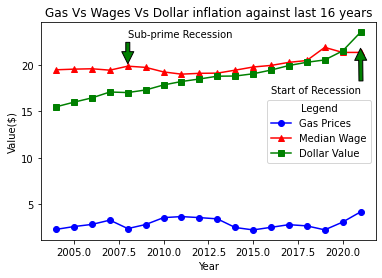

In [58]:
# Add 2 more dimensions

median_wage_axis = all_combined_filtered_df["median_wage"].str.slice(1).astype("float64")
dollar_value_axis = all_combined_filtered_df["dollar_value"]

# Plot the line
plt.plot(x_axis_data, gas_axis, marker ='o', color='blue', label="Gas Prices")
plt.plot(x_axis_data, median_wage_axis, marker ='^', color='red', label="Median Wage")
plt.plot(x_axis_data, dollar_value_axis, marker ='s', color='green', label="Dollar Value")

plt.legend(loc='right', title='Legend')
plt.xlabel("Year")
plt.ylabel("Value($)")

plt.annotate('Sub-prime Recession', xy =(2008, 20),
                xytext =(2008, 23), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)

plt.annotate('Start of Recession', xy =(2021, 22),
                xytext =(2016, 17), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
plt.title("Gas Vs Wages Vs Dollar inflation against last 16 years")

plt.savefig("Resources/gas_dollar_wage_line.png")
plt.show()

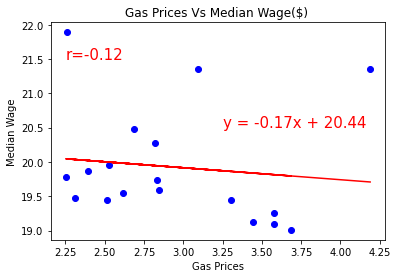

In [59]:
# Prepare scatter chart

correlation = st.pearsonr(gas_axis, median_wage_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(gas_axis, median_wage_axis)
regress_values = gas_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(gas_axis, median_wage_axis, marker="o", facecolor="b", edgecolor="b")
plt.plot(gas_axis,regress_values,"r-")
plt.annotate(line_eq,(3.25,20.5),fontsize=15,color="red")
r=(f"r={round(correlation[0],2)}")
plt.annotate(r,(2.25,21.5),fontsize=15,color="red")


plt.xlabel("Gas Prices")
plt.ylabel("Median Wage")
plt.title("Gas Prices Vs Median Wage($) ")
plt.savefig("Resources/gas_wages_scatter.png")

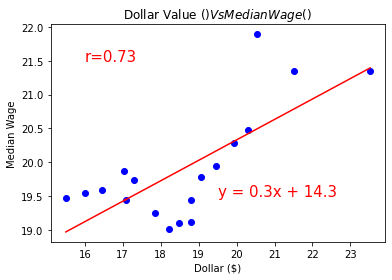

In [60]:
# Prepare scatter chart

correlation = st.pearsonr(dollar_value_axis, median_wage_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(dollar_value_axis, median_wage_axis)
regress_values = dollar_value_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(dollar_value_axis, median_wage_axis, marker="o", facecolor="b", edgecolor="b")
plt.plot(dollar_value_axis,regress_values,"r-")
plt.annotate(line_eq,(19.5,19.5),fontsize=15,color="red")
r=(f"r={round(correlation[0],2)}")
plt.annotate(r,(16,21.5),fontsize=15,color="red")

plt.xlabel("Dollar ($)")
plt.ylabel("Median Wage")
plt.title("Dollar Value ($) Vs Median Wage($) ")
plt.savefig("Resources/dollar_wages_scatter.png")

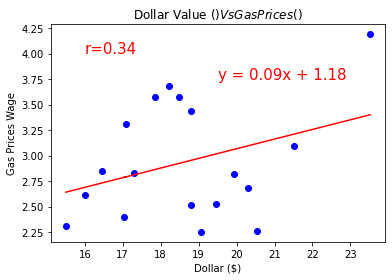

In [61]:
# Prepare scatter chart

correlation = st.pearsonr(dollar_value_axis, gas_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(dollar_value_axis, gas_axis)
regress_values = dollar_value_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(dollar_value_axis, gas_axis, marker="o", facecolor="b", edgecolor="b")
plt.plot(dollar_value_axis,regress_values,"r-")
plt.annotate(line_eq,(19.5,3.75),fontsize=15,color="red")
r=(f"r={round(correlation[0],2)}")
plt.annotate(r,(16,4),fontsize=15,color="red")

plt.xlabel("Dollar ($)")
plt.ylabel("Gas Prices Wage")
plt.title("Dollar Value ($) Vs Gas Prices($) ")
plt.savefig("Resources/dollar_gas_scatter.png")